In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import matplotlib as mpl
import seaborn as sns
from scipy.stats import ttest_ind
import re
import matplotlib as mpl
%matplotlib inline

In [2]:
inibi_data_cell_pc = pd.read_csv("data/inifak_exp2_cell_pc.csv")

In [3]:
inibi_data_cell_pc.head()

,Unnamed: 0,image,tto,nucleo,nrois,pc_gh2ax_ku80,pc_fak_ku80,pc_gh2ax_fak
0,0,1,doxdmso,0,2,-1.000000,1.000000,-1.000000
1,1,1,doxdmso,1,8,0.890368,0.959519,0.957507
2,2,2,doxdmso,0,88,0.910313,0.957379,0.960056
3,3,2,doxdmso,1,4,-0.611650,-0.486423,0.201937
4,4,3,doxdmso,0,11,0.909244,0.938704,0.964817


In [4]:
filtro = (inibi_data_cell_pc['nrois'] >= 4)
maisquecinco = inibi_data_cell_pc[filtro]
maisquecinco['nrois'].describe()

count    76.000000
mean     21.184211
std      19.172696
min       4.000000
25%      10.000000
50%      14.000000
75%      24.500000
max      99.000000
Name: nrois, dtype: float64

In [5]:
dox_dmso_filt =  (maisquecinco['tto'] == 'doxdmso')
dox_pf_filt =  (maisquecinco['tto'] == 'doxpf')

dox_dmso_gh2axku80_pc  = maisquecinco.loc[dox_dmso_filt, 'pc_gh2ax_ku80']
dox_dmso_gh2axfak_pc  = maisquecinco.loc[dox_dmso_filt, 'pc_gh2ax_fak']
dox_dmso_fakku80_pc  = maisquecinco.loc[dox_dmso_filt, 'pc_fak_ku80']

dox_pf_gh2axku80_pc  = maisquecinco.loc[dox_pf_filt, 'pc_gh2ax_ku80']
dox_pf_gh2axfak_pc  = maisquecinco.loc[dox_pf_filt, 'pc_gh2ax_fak']
dox_pf_fakku80_pc  = maisquecinco.loc[dox_pf_filt, 'pc_fak_ku80']


In [6]:
# colocando valores com menos de 5 foci

# dox_dmso_filt =  (inibi_data_cell_pc['tto'] == 'doxdmso')
# dox_pf_filt =  (inibi_data_cell_pc['tto'] == 'doxpf')

# dox_dmso_gh2axku80_pc  = inibi_data_cell_pc.loc[dox_dmso_filt, 'pc_gh2ax_ku80']
# dox_dmso_gh2axfak_pc  = inibi_data_cell_pc.loc[dox_dmso_filt, 'pc_gh2ax_fak']
# dox_dmso_fakku80_pc  = inibi_data_cell_pc.loc[dox_dmso_filt, 'pc_fak_ku80']

# dox_pf_gh2axku80_pc  = inibi_data_cell_pc.loc[dox_pf_filt, 'pc_gh2ax_ku80']
# dox_pf_gh2axfak_pc  = inibi_data_cell_pc.loc[dox_pf_filt, 'pc_gh2ax_fak']
# dox_pf_fakku80_pc  = inibi_data_cell_pc.loc[dox_pf_filt, 'pc_fak_ku80']

t=-0.183, p=0.85509
NS


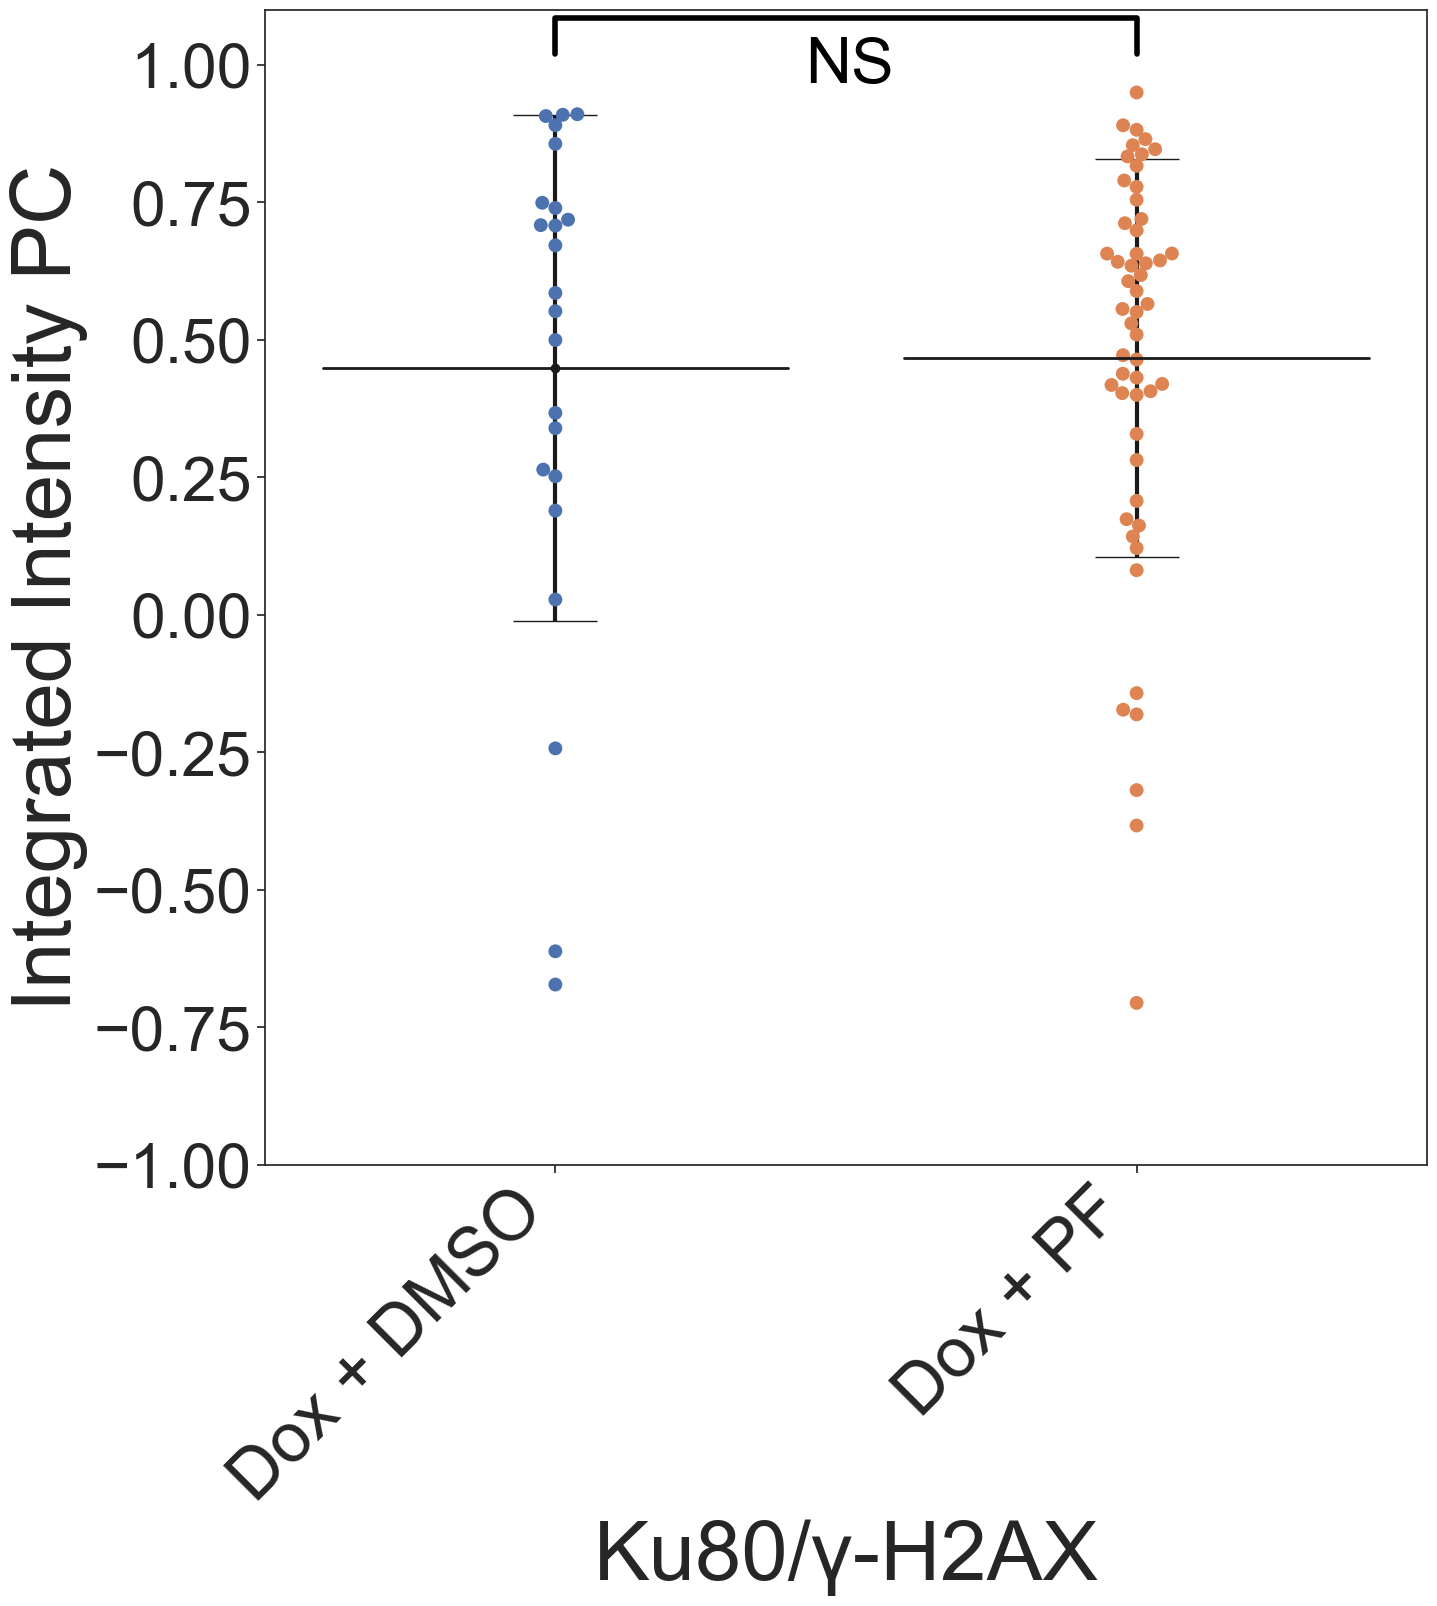

In [7]:
dataimage = maisquecinco

#----------------------------------
grupo1 = dox_dmso_gh2axku80_pc
grupo2 = dox_pf_gh2axku80_pc
#-----------------------

nome_figura = 'swarmplot_pc_cells_ku80gh2ax_ii_ini_v2.2'

label_eixo_y = 'Integrated Intensity PC'
label_eixo_x = 'Ku80/γ-H2AX'
tamanho_label = 60
other_label = 40
#ttest groups



def ttesting(a,b):
    stat, p = ttest_ind(a, b)
    print('t=%.3f, p=%.5f' % (stat, p))

    def convert_pvalue_to_asterisks(pvalue):
        if pvalue <= 0.0001:
            return "****"
        elif pvalue <= 0.001:
            return "***"
        elif pvalue <= 0.01:
            return "**"
        elif pvalue <= 0.05:
            return "*"
        return "NS"

    pValue = convert_pvalue_to_asterisks(p)
    print(convert_pvalue_to_asterisks(p))
    return pValue 

# plotar traço #########################################
# essa parte serve para criar aquela barra encima do das duas barras
# agradecimentos para Sofia que me mostrou isso pela primeira vez e onde achou
# agradecimento ao Bruno que é o melhor programador que conheço e me ajudou.


def traco(text,X,Y,hight):
    x = (X[0]+X[1])/2
    y = 1.1* max(Y[0], Y[1])+hight #caso o traço esteja no lugar errado, é aqui onde arruma, no valor antes da multiplicação
    dx = abs(X[0]-X[1])
    yp = y 
    xp = x-.07 # caso você achar que o asterísco não esta no lugar certo, altere o valor que é subtraido do x até que ele apareça onde é desejado
       
    props = {'connectionstyle':'bar','arrowstyle':'-',\
            'shrinkA':100,'shrinkB':100,'linewidth':4,'color':"black"}
    ax.annotate(text,fontsize =46, xy=(xp,yp+.2), zorder=10,color="#000000")
    ax.annotate('', xy=(X[0],y), xytext=(X[1],y), arrowprops=props)

# gráfico #########################################   

# sns.set_context("paper")
sns.set(rc={"figure.figsize":(15, 15)}) # width=20, height=20
sns.despine()
sns.set_style("ticks")


x = [0,1]

ax = sns.swarmplot(x="tto", y="pc_gh2ax_ku80", data=maisquecinco, size=10)


# plot the mean line (na verdade plota um boxplot mas apaga tudo menos a linha da média)
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="tto",
            y="pc_gh2ax_ku80",
            data=maisquecinco,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

plt.ylabel(label_eixo_y, fontsize = tamanho_label)
plt.xlabel(label_eixo_x, fontsize = tamanho_label)

#plt.title(' ', fontsize =80)
plt.xticks([0,1],['Dox + DMSO', 'Dox + PF'])
labels = ['Dox + DMSO', 'Dox + PF']
ax.set_xticklabels(labels, fontsize=tamanho_label-10, rotation=45, ha='right')

# aqui você controla a escala da fonte

means1 = [grupo1.mean(), grupo2.mean()]
stds1 = [grupo1.std(), grupo2.std()]

plt.errorbar(x, means1, stds1, fmt='ok', capsize= 30, linewidth = 3)

ax.tick_params(axis='y', which='major', labelsize=tamanho_label-15)
# ax.tick_params(axis='x', which='minor', tamanho_label-15))

# chamando def para os traços
traco(ttesting(grupo1,grupo2),x[0:2],[.78,.7],-.09)
# traco(ttesting(grupo3,grupo4),x[2:4],[.86,.8],0)

plt.ylim(-1, 1.1)
#plt.margins(y=4)

plt.savefig(nome_figura + ".pdf", bbox_inches='tight') #salvar em .pdf pra sempre ter uma resolução infinita
plt.savefig(nome_figura + ".jpeg", bbox_inches='tight')
# plt.tight_layout()
plt.show()

t=0.167, p=0.86762
NS


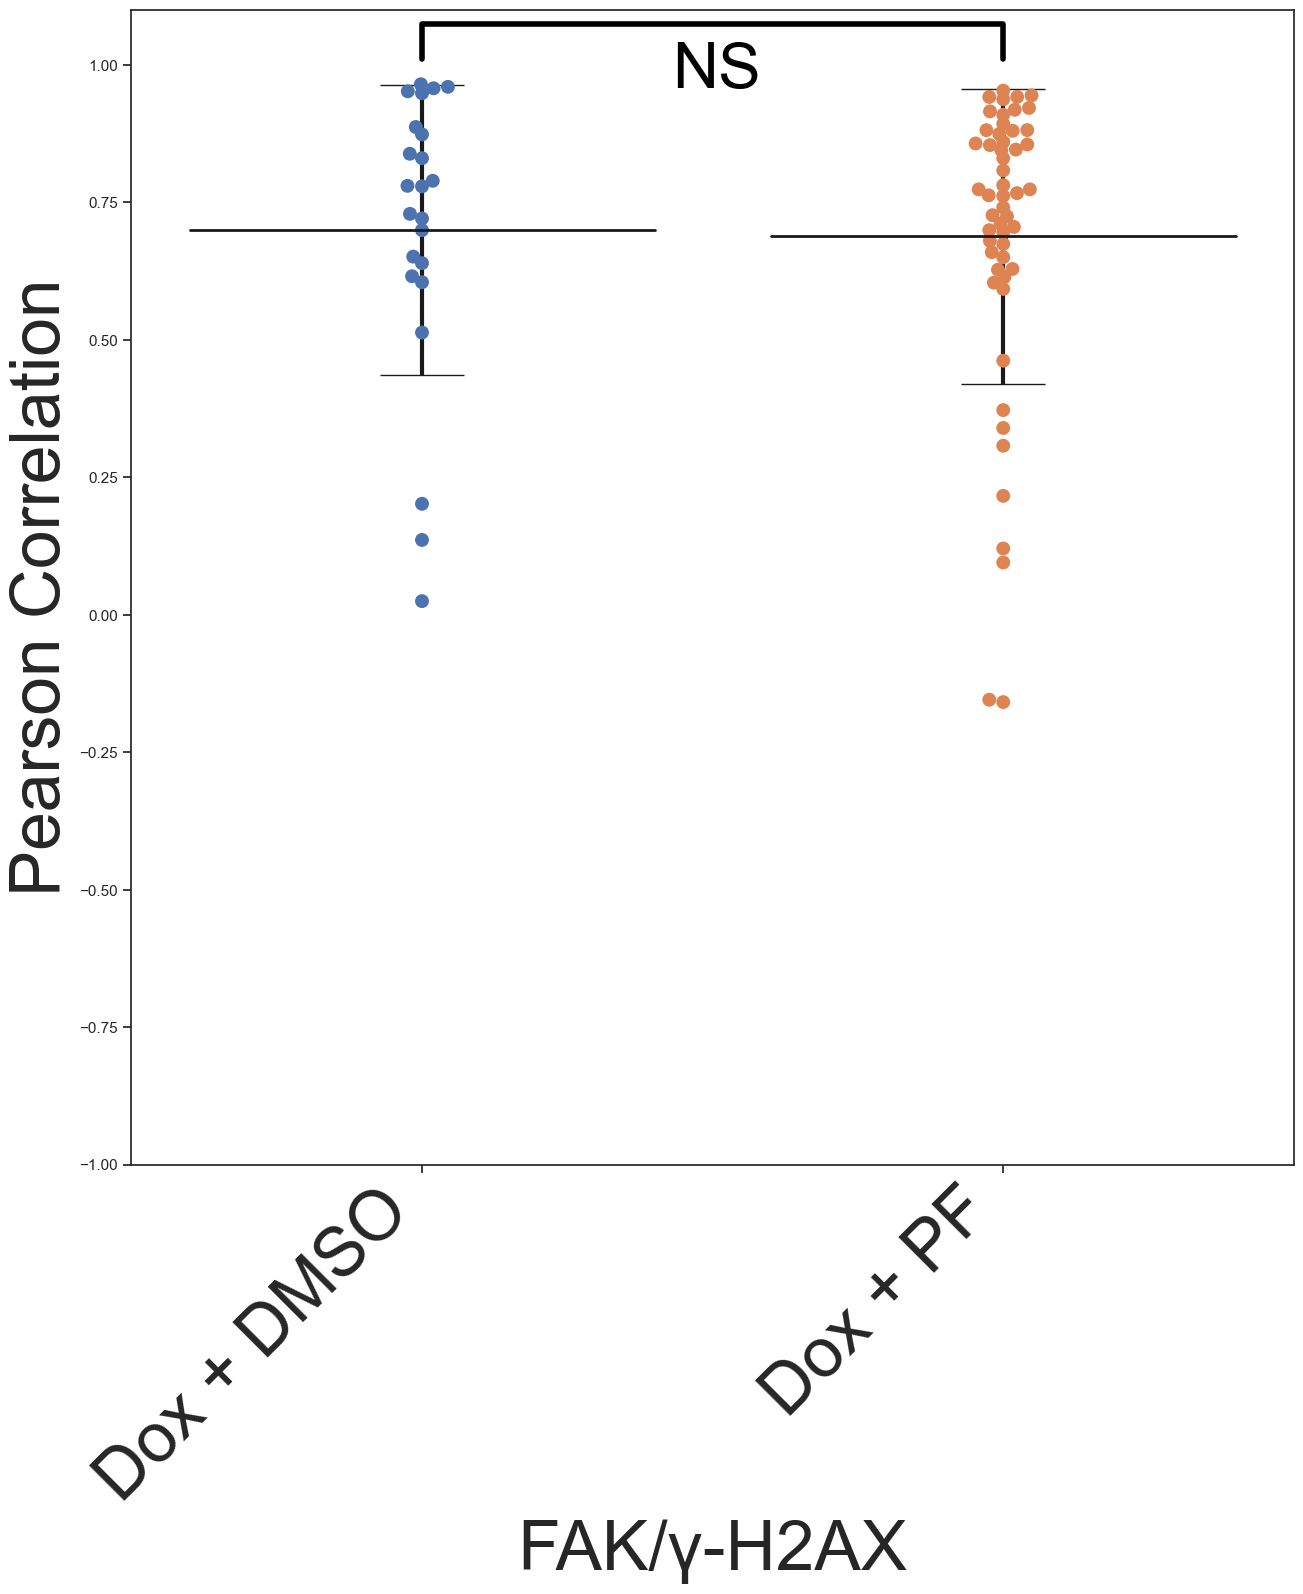

In [8]:
dataimage = maisquecinco

#----------------------------------


grupo1 = dox_dmso_gh2axfak_pc
grupo2 = dox_pf_gh2axfak_pc

#-----------------------

nome_figura = 'swarmplot_pc_cells_fakgh2ax_ii_ini_v2'

label_eixo_y = 'Pearson Correlation'
label_eixo_x = 'FAK/γ-H2AX'
tamanho_label = 50
other_label = 40
tick_size = 50
#ttest groups


# sns.set_context("paper")
sns.despine()
sns.set_style("ticks")

def ttesting(a,b):
    stat, p = ttest_ind(a, b)
    print('t=%.3f, p=%.5f' % (stat, p))

    def convert_pvalue_to_asterisks(pvalue):
        if pvalue <= 0.0001:
            return "****"
        elif pvalue <= 0.001:
            return "***"
        elif pvalue <= 0.01:
            return "**"
        elif pvalue <= 0.05:
            return "*"
        return "NS"

    pValue = convert_pvalue_to_asterisks(p)
    print(convert_pvalue_to_asterisks(p))
    return pValue 

# plotar traço #########################################
# essa parte serve para criar aquela barra encima do das duas barras
# agradecimentos para Sofia que me mostrou isso pela primeira vez e onde achou
# agradecimento ao Bruno que é o melhor programador que conheço e me ajudou.


def traco(text,X,Y,hight):
    x = (X[0]+X[1])/2
    y = 1.1* max(Y[0], Y[1])+hight #caso o traço esteja no lugar errado, é aqui onde arruma, no valor antes da multiplicação
    dx = abs(X[0]-X[1])
    yp = y 
    xp = x-.07 # caso você achar que o asterísco não esta no lugar certo, altere o valor que é subtraido do x até que ele apareça onde é desejado
       
    props = {'connectionstyle':'bar','arrowstyle':'-',\
            'shrinkA':100,'shrinkB':100,'linewidth':4,'color':"black"}
    ax.annotate(text,fontsize =46, xy=(xp,yp+.20), zorder=10,color="#000000")
    ax.annotate('', xy=(X[0],y), xytext=(X[1],y), arrowprops=props)

# gráfico #########################################   

x = [0,1]

ax = sns.swarmplot(x="tto", y="pc_gh2ax_fak", data=dataimage, size=10)
sns.set(rc={"figure.figsize":(15, 15)}) # width=20, height=20

# plot the mean line (na verdade plota um boxplot mas apaga tudo menos a linha da média)
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="tto",
            y="pc_gh2ax_fak",
            data=dataimage,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

plt.ylabel(label_eixo_y, fontsize = tamanho_label)
plt.xlabel(label_eixo_x, fontsize = tamanho_label)

#plt.title(' ', fontsize =80)
plt.xticks([0,1],['Dox + DMSO', 'Dox + PF'])
labels = ['Dox + DMSO', 'Dox + PF']
ax.set_xticklabels(labels, fontsize=tick_size, rotation=45, ha='right')
mpl.rcParams['ytick.labelsize'] =  tick_size
# aqui você controla a escala da fonte

means1 = [grupo1.mean(), grupo2.mean()]
stds1 = [grupo1.std(), grupo2.std()]

plt.errorbar(x, means1, stds1, fmt='ok', capsize= 30, linewidth = 3)



# chamando def para os traços
traco(ttesting(grupo1,grupo2),x[0:2],[.78,.7],-.1)
# traco(ttesting(grupo3,grupo4),x[2:4],[.86,.8],0)

plt.ylim(-1, 1.1)
#plt.margins(y=4)
sns.set(font_scale = 3)
plt.savefig(nome_figura + ".pdf", bbox_inches='tight') #salvar em .pdf pra sempre ter uma resolução infinita
plt.savefig(nome_figura + ".jpeg", bbox_inches='tight')
# plt.tight_layout()
plt.show()

t=-2.517, p=0.01399
*


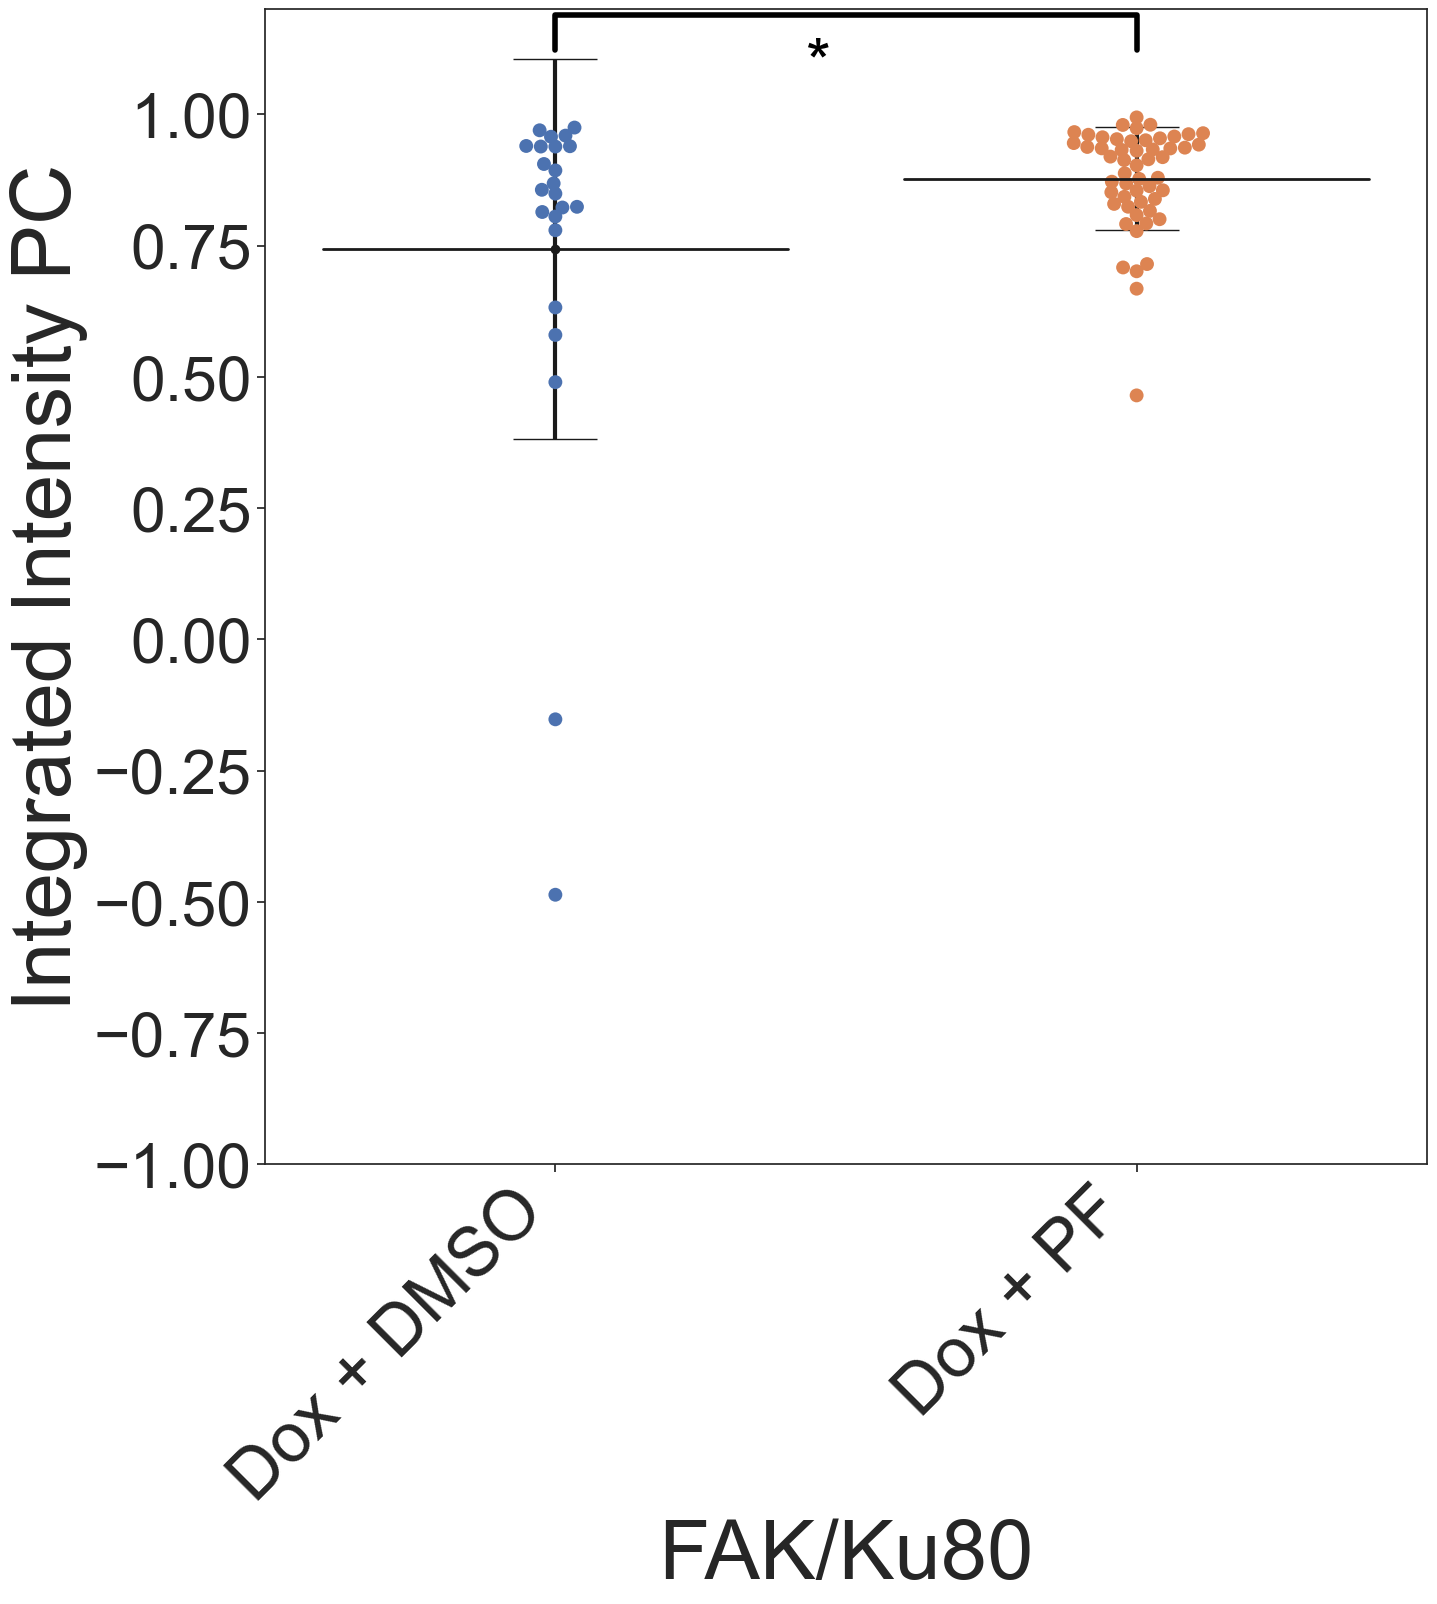

[0.36180095866425505, 0.0978606431301493]


In [9]:
dataimage = maisquecinco

#----------------------------------


grupo1 = dox_dmso_fakku80_pc
grupo2 = dox_pf_fakku80_pc

#-----------------------

nome_figura = 'swarmplot_pc_cells_fakku80_ii_ini_v2'

label_eixo_y = 'Integrated Intensity PC'
label_eixo_x = 'FAK/Ku80'
tamanho_label = 60
other_label = 50
#ttest groups


# sns.set_context("paper")
sns.despine()
sns.set_style("ticks")

def ttesting(a,b):
    stat, p = ttest_ind(a, b)
    print('t=%.3f, p=%.5f' % (stat, p))

    def convert_pvalue_to_asterisks(pvalue):
        if pvalue <= 0.0001:
            return "****"
        elif pvalue <= 0.001:
            return "***"
        elif pvalue <= 0.01:
            return "**"
        elif pvalue <= 0.05:
            return "*"
        return "NS"

    pValue = convert_pvalue_to_asterisks(p)
    print(convert_pvalue_to_asterisks(p))
    return pValue 

# plotar traço #########################################
# essa parte serve para criar aquela barra encima do das duas barras
# agradecimentos para Sofia que me mostrou isso pela primeira vez e onde achou
# agradecimento ao Bruno que é o melhor programador que conheço e me ajudou.


def traco(text,X,Y,hight):
    x = (X[0]+X[1])/2
    y = 1.1* max(Y[0], Y[1])+hight #caso o traço esteja no lugar errado, é aqui onde arruma, no valor antes da multiplicação
    dx = abs(X[0]-X[1])
    yp = y 
    xp = x-.07 # caso você achar que o asterísco não esta no lugar certo, altere o valor que é subtraido do x até que ele apareça onde é desejado
       
    props = {'connectionstyle':'bar','arrowstyle':'-',\
            'shrinkA':100,'shrinkB':100,'linewidth':4,'color':"black"}
    ax.annotate(text,fontsize =46, xy=(xp,yp+.20), zorder=10,color="#000000")
    ax.annotate('', xy=(X[0],y), xytext=(X[1],y), arrowprops=props)

# gráfico #########################################   

x = [0,1]

ax = sns.swarmplot(x="tto", y="pc_fak_ku80", data=dataimage, size=10)
sns.set(rc={"figure.figsize":(15, 15)}) # width=20, height=20

# plot the mean line (na verdade plota um boxplot mas apaga tudo menos a linha da média)
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="tto",
            y="pc_fak_ku80",
            data=dataimage,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

plt.ylabel(label_eixo_y, fontsize = tamanho_label)
plt.xlabel(label_eixo_x, fontsize = tamanho_label)

#plt.title(' ', fontsize =80)
plt.xticks([0,1],['Dox + DMSO', 'Dox + PF'])
labels = ['Dox + DMSO', 'Dox + PF']
ax.set_xticklabels(labels, fontsize=tamanho_label-10, rotation=45, ha='right')
ax.tick_params(axis='y', which='major', labelsize=tamanho_label-15)
# aqui você controla a escala da fonte

means1 = [grupo1.mean(), grupo2.mean()]
stds1 = [grupo1.std(), grupo2.std()]

plt.errorbar(x, means1, stds1, fmt='ok', capsize= 30, linewidth = 3)


# chamando def para os traços
traco(ttesting(grupo1,grupo2),x[0:2],[.78,.7],0)
# traco(ttesting(grupo3,grupo4),x[2:4],[.86,.8],0)

plt.ylim(-1, 1.2)
#plt.margins(y=4)
sns.set(font_scale = 3)
plt.savefig(nome_figura + ".pdf", bbox_inches='tight') #salvar em .pdf pra sempre ter uma resolução infinita
plt.savefig(nome_figura + ".jpeg", bbox_inches='tight')
# plt.tight_layout()
plt.show()


print(stds1)

In [10]:
doxdmso1 = inibi_data_cell_pc[inibi_data_cell_pc['tto'] == 'doxdmso']
doxpf1 = inibi_data_cell_pc[inibi_data_cell_pc['tto'] == 'doxpf']

print(doxpf1['nrois'].size)
print(doxdmso1['nrois'].size)

64
25
